In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load CSV
import chardet

# Gunakan encoding yang ditemukan
data = pd.read_csv("imdb (2).csv", encoding='latin1', delimiter=';')

# # 2. Preprocessing (Sederhana untuk Contoh)
data['Review_clean'] = data['Review'].str.lower().str.replace('[^a-z\s]', '')

In [40]:
# 3. Vectorization
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['Review_clean'])

# 4. Labeling (Contoh Semi-Supervised dengan Lexicon-Based VADER)
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = sia.polarity_scores(text)
    if score['compound'] > 0.05:
        return 'Positive'
    elif score['compound'] < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

data['Sentiment'] = data['Review'].apply(get_sentiment)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [48]:
print(data['Review_clean'])


0      ufotable is honestly on a roll with the hit de...
1      set your heart ablaze..... rengoku-sanah final...
2                                         nearly perfect
3      if you liked the animation of the season 1 of ...
4                           10 is not enough, from japan
                             ...                        
410    i'm so sorry everyone...but i didn't like it; ...
411    first half of the film was pretty cheesy, slow...
412    demon slayer the movie: mugen train (2020) is ...
413    good. but the hype is totally meaningless. one...
414           nice animations, but very corny and clich
Name: Review_clean, Length: 415, dtype: object


In [41]:
# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, data['Sentiment'], test_size=0.2, random_state=42)

# 6. Model Training and Comparison
# SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)

# 7. Evaluation
print("SVM Classification Report:")
print(classification_report(y_test, svm_pred))

print("Logistic Regression Classification Report:")
print(classification_report(y_test, log_reg_pred))

SVM Classification Report:
              precision    recall  f1-score   support

    Negative       0.33      0.12      0.18         8
     Neutral       0.67      0.40      0.50        10
    Positive       0.82      0.94      0.88        65

    accuracy                           0.80        83
   macro avg       0.61      0.49      0.52        83
weighted avg       0.76      0.80      0.77        83

Logistic Regression Classification Report:
              precision    recall  f1-score   support

    Negative       0.50      0.12      0.20         8
     Neutral       1.00      0.30      0.46        10
    Positive       0.82      0.98      0.90        65

    accuracy                           0.82        83
   macro avg       0.77      0.47      0.52        83
weighted avg       0.81      0.82      0.78        83



In [42]:
# 8. Accuracy
from sklearn.metrics import accuracy_score

svm_accuracy = accuracy_score(y_test, svm_pred) * 100  # Menghitung dalam persen
log_reg_accuracy = accuracy_score(y_test, log_reg_pred) * 100  # Menghitung dalam persen

print(f"SVM Accuracy: {svm_accuracy:.2f}%")
print(f"Logistic Regression Accuracy: {log_reg_accuracy:.2f}%")

SVM Accuracy: 79.52%
Logistic Regression Accuracy: 81.93%


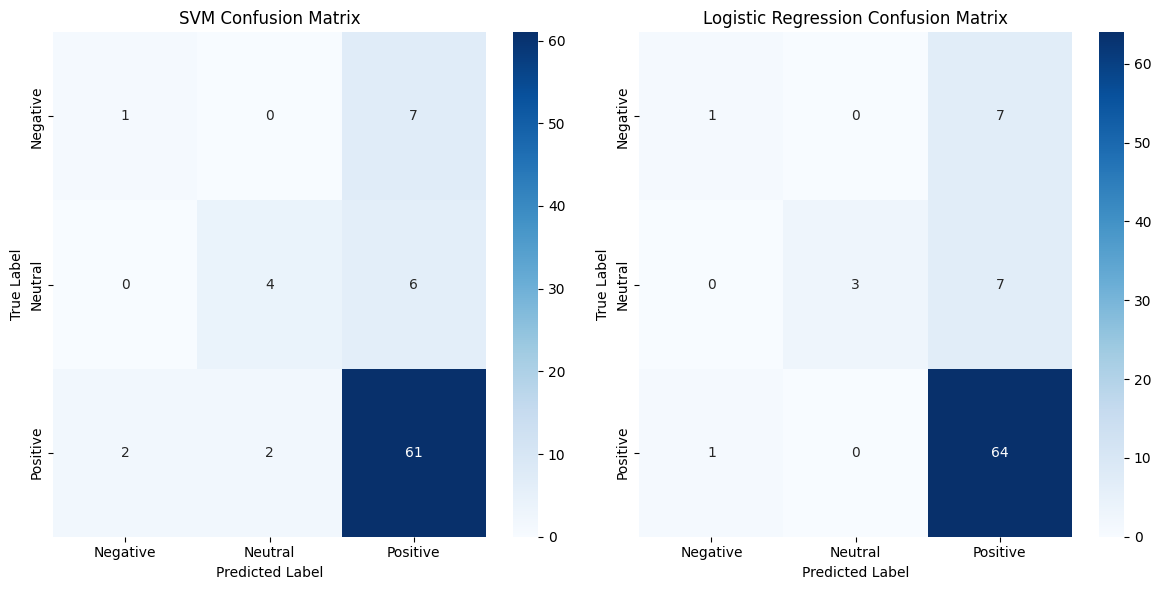

In [43]:
# 9. Visualisasi
# Confusion Matrix untuk SVM
cm_svm = confusion_matrix(y_test, svm_pred)
cm_logreg = confusion_matrix(y_test, log_reg_pred)

# Plot Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'], ax=axes[0])
axes[0].set_title('SVM Confusion Matrix')
axes[0].set_ylabel('True Label')
axes[0].set_xlabel('Predicted Label')

sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'], ax=axes[1])
axes[1].set_title('Logistic Regression Confusion Matrix')
axes[1].set_ylabel('True Label')
axes[1].set_xlabel('Predicted Label')

plt.tight_layout()
plt.show()

<ipython-input-44-1fa9957ec125>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


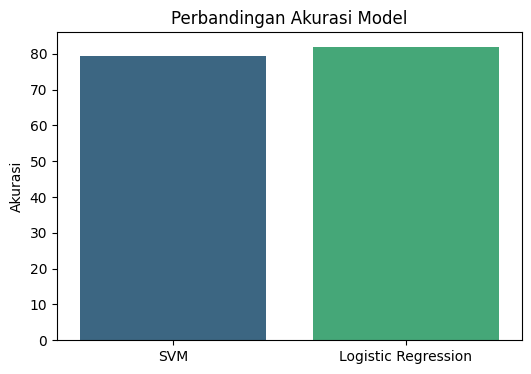

In [44]:
# Bar plot perbandingan akurasi
models = ['SVM', 'Logistic Regression']
accuracies = [svm_accuracy, log_reg_accuracy]

plt.figure(figsize=(6, 4))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Perbandingan Akurasi Model')
plt.ylabel('Akurasi')
plt.show()

In [45]:
# 10. Hitung jumlah masing-masing kategori (Negatif, Positif, Netral)
print("\nJumlah kategori (Negatif, Positif, Netral) pada hasil prediksi SVM:")
print(pd.Series(svm_pred).value_counts())

print("\nJumlah kategori (Negatif, Positif, Netral) pada hasil prediksi Logistic Regression:")
print(pd.Series(log_reg_pred).value_counts())


Jumlah kategori (Negatif, Positif, Netral) pada hasil prediksi SVM:
Positive    74
Neutral      6
Negative     3
Name: count, dtype: int64

Jumlah kategori (Negatif, Positif, Netral) pada hasil prediksi Logistic Regression:
Positive    78
Neutral      3
Negative     2
Name: count, dtype: int64
